# Boston Housing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Suitable default display for floats
pd.options.display.float_format = '{:,.3f}'.format

# Отобразить все колонки
# pd.set_option('max_columns', None)

OptionError: 'Pattern matched multiple keys'

In [2]:
# Read csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(r"C:\Users\Александр\OneDrive\Python\Python projects\020_ML practice\boston_housing\housing.csv",
                   header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


#### Переменные в оригинале
- CRIM per capita crime rate by town 
- ZN proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS proportion of non-retail business acres per town 
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX nitric oxides concentration (parts per 10 million) 
- RM average number of rooms per dwelling 
- AGE proportion of owner-occupied units built prior to 1940 
- DIS weighted distances to five Boston employment centres 
- RAD index of accessibility to radial highways 
- TAX full-value property-tax rate per 10,000 dol 
- PTRATIO pupil-teacher ratio by town 
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
- LSTAT lower status of the population 
- MEDV Median value of owner-occupied homes in 1000's dol

#### Переменные на русском
- CRIM Уровень преступности на душу населения по городам
- ZN доля жилых земель, зонированных для участков площадью более 25 000 кв. футов.
- INDUS доля площадей под неторговую деятельность на город
- CHAS Дамми переменная Charles River (= 1, если тракт ограничивает реку; 0 в противном случае)
- NOX Концентрация оксидов азота (частей на 10 миллионов)
- RM Среднее количество комнат в жилом помещении
- AGE Доля квартир, занимаемых владельцами, построенных до 1940 г.
- DIS взвесил расстояния до пяти центров занятости Бостона
- RAD Индекс доступности радиальных автомобильных дорог
- TAX Полная ставка налога на имущество за 10 000 дол
- PTRATIO Соотношение учеников и учителей по городам
- B 1000(Bk - 0,63)^2, где Bk — доля чернокожих по городам.
- LSTAT более низкий статус населения
- MEDV Медианная стоимость домов, занимаемых владельцами, в тысячах долларов

In [3]:
print(df.shape, '\n')
print(df.columns)
df.describe()

(506, 14) 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


From get-go, two data columns show interesting summeries. They are: ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these colums may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).

In [4]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for all columns
skewness = df.agg(skew)
kurtosis = df.agg(kurtosis)

# Create a table to display the results
df_skew_kurt = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
df_skew_kurt

,Skewness,Kurtosis
CRIM,5.208,36.753
ZN,2.219,3.980
INDUS,0.294,-1.233
CHAS,3.396,9.531
NOX,0.727,-0.076
RM,0.402,1.861
AGE,-0.597,-0.970
DIS,1.009,0.471
RAD,1.002,-0.871
TAX,0.668,-1.143


## Missing data

In [5]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
CRIM,0,0.000
ZN,0,0.000
INDUS,0,0.000
CHAS,0,0.000
NOX,0,0.000
RM,0,0.000
AGE,0,0.000
DIS,0,0.000
RAD,0,0.000
TAX,0,0.000


## Outliers

In [6]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [7]:
df['MEDV'].sort_values(ascending=False).head(10)

283   50.000
225   50.000
369   50.000
370   50.000
371   50.000
372   50.000
186   50.000
204   50.000
257   50.000
195   50.000
Name: MEDV, dtype: float64

In [8]:
df = df[~(df['MEDV'] >= 50.0)]
print(np.shape(df))

(490, 14)


## Analyse target and possible features

### Target: MEDV

In [9]:
df['MEDV'].describe()

count   490.000
mean     21.636
std       7.865
min       5.000
25%      16.700
50%      20.900
75%      24.675
max      48.800
Name: MEDV, dtype: float64

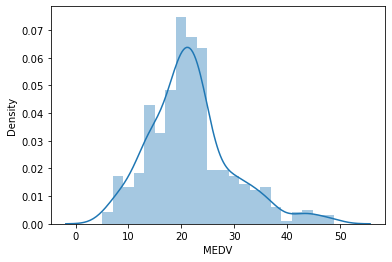

In [10]:
sns.distplot(df['MEDV']);

- peakness
- positively skewed
- deviate from norm distr

In [11]:
#skewness and kurtosis
print("Skewness: %f" % df['MEDV'].skew())
print("Kurtosis: %f" % df['MEDV'].kurt())

Skewness: 0.775660
Kurtosis: 1.049637


### Numeric features

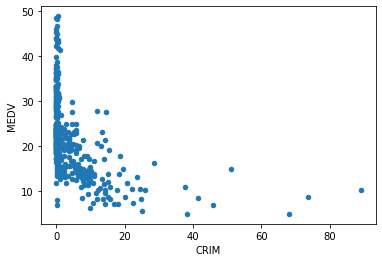

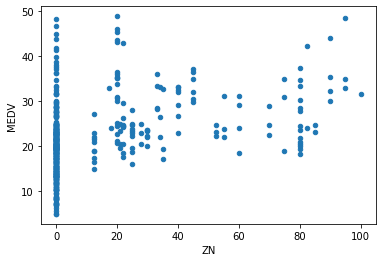

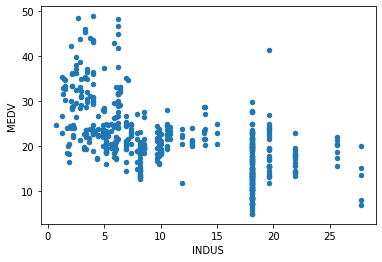

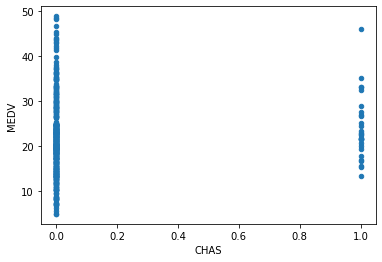

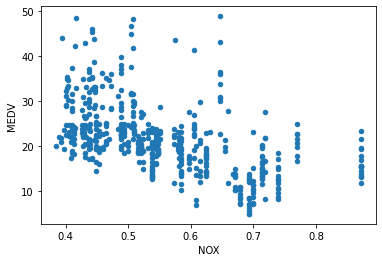

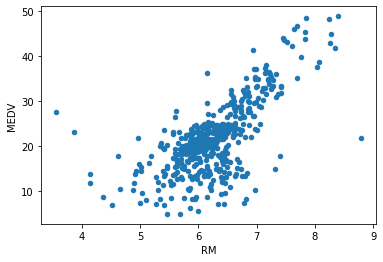

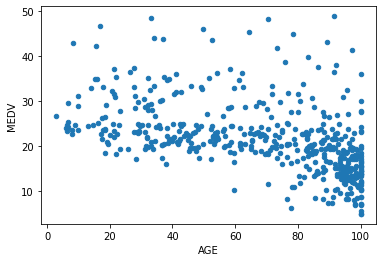

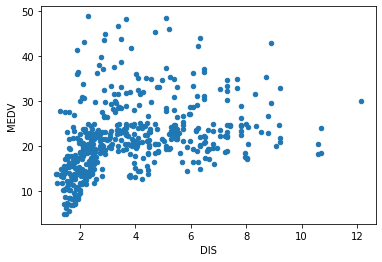

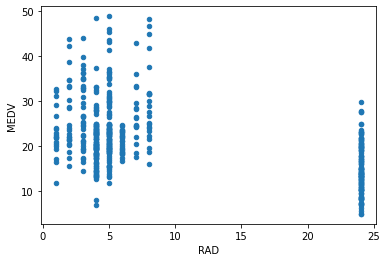

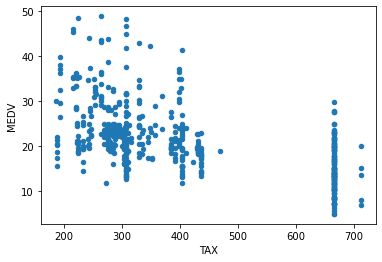

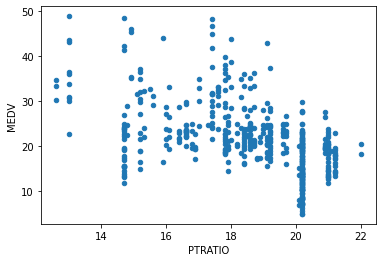

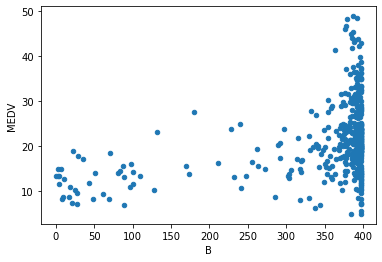

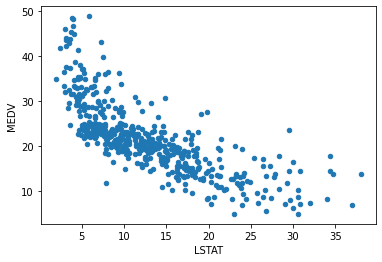

In [12]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

#scatter plot
for var in X:
    data = pd.concat([y, df[var]], axis=1)
    data.plot.scatter(x=var, y='MEDV');

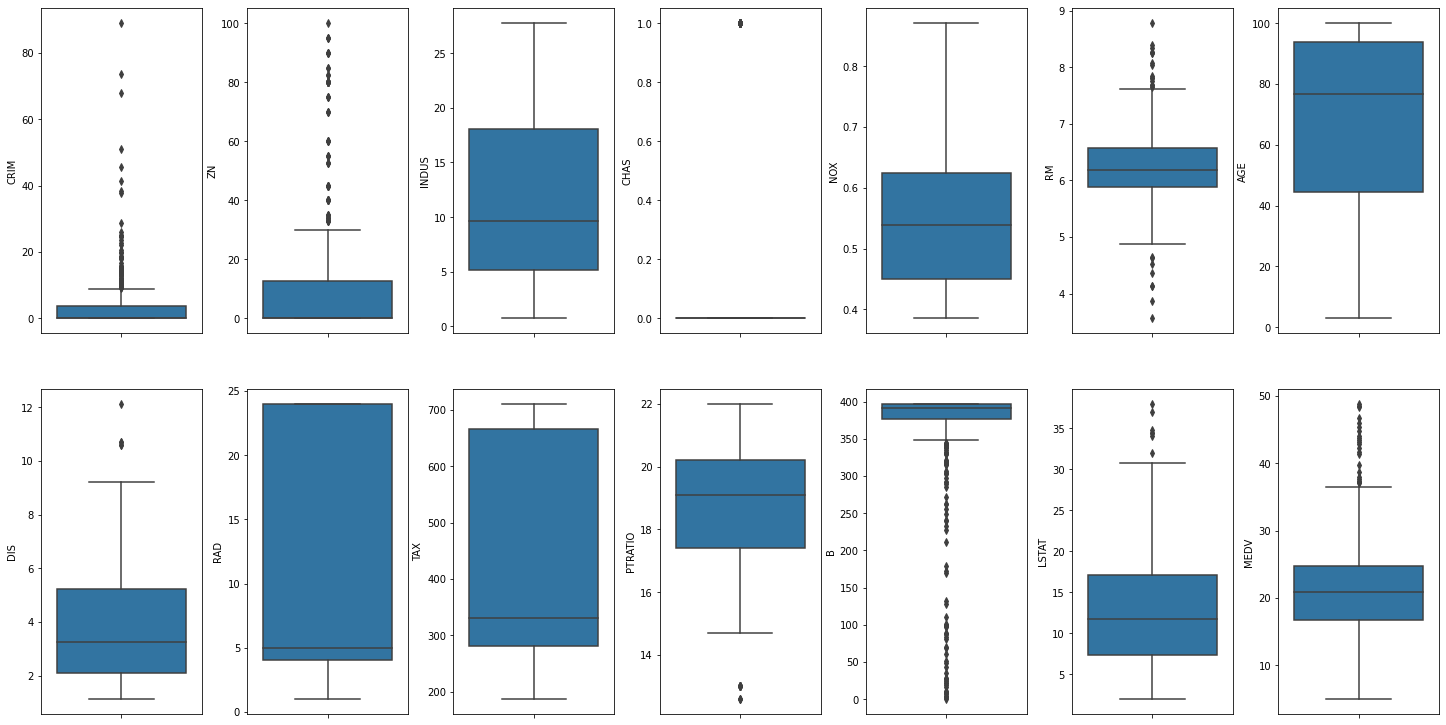

In [13]:
# box plots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0);

### Выводы
Линейная зависимость:
- Позитивная RM, DIS (незначительная)
- Негативная LSTAT

### Cathegorical features

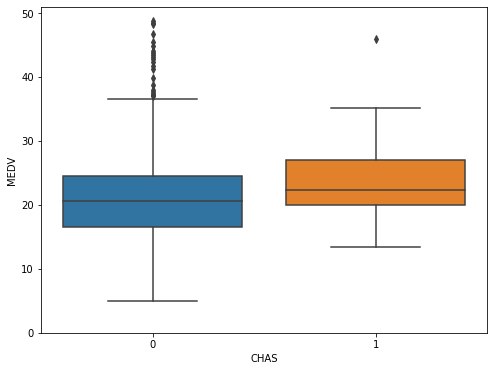

In [14]:
#box plot CHAS/MEDV
var = 'CHAS'
data = pd.concat([df['MEDV'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MEDV", data=df)
fig.axis(ymin=0);

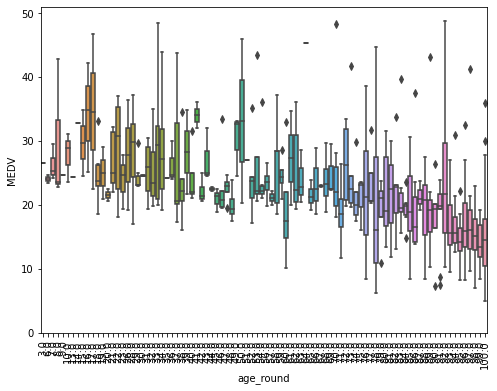

In [15]:
df['age_round'] = df['AGE'].round(decimals=0)

#box plot AGE_round/MEDV
var = 'age_round'
data = pd.concat([df['MEDV'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="age_round", y="MEDV", data=df)
fig.axis(ymin=0)
plt.xticks(rotation=90)

df = df.drop('age_round', axis=1)

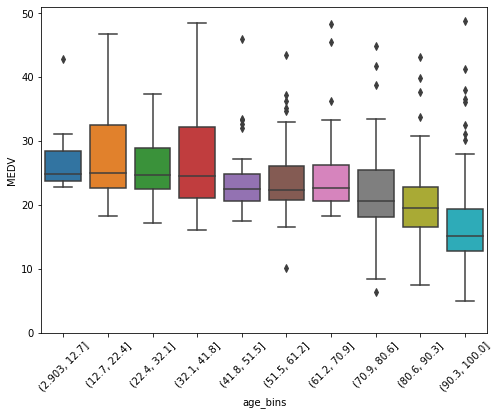

In [16]:
# Define the number of bins you want to create
num_bins = 10

# Create the bins using pd.cut()
df['age_round'] = df['AGE'].round(decimals=0)
df['age_bins'] = pd.cut(df['age_round'], bins=num_bins)

# Create a box plot using the 'age_bins' column and the 'MEDV' column
var = 'age_bins'
data = pd.concat([df['MEDV'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MEDV", data=data)
fig.axis(ymin=0)
plt.xticks(rotation=45)

# Drop the 'age_round' column if needed
df.drop(['age_round', 'age_bins'], axis=1, inplace=True)

### Выводы
- Дома с чаз трактом в среднем стоят дороже


- Стоимость недвижки уменьшается с возрастом здания. В среднем стоят меньше с годами
- Новые здания (в пределах 12 лет) находятся примерно в одной категории
- Есть аутлаеры вниз (возможно устаревшие дома под снос или в неблагоприятном квартале)
- Наибольший разброс в домах 30-40 (хороший жилой фонд, не совсем старые)


## Корреляционный анализ

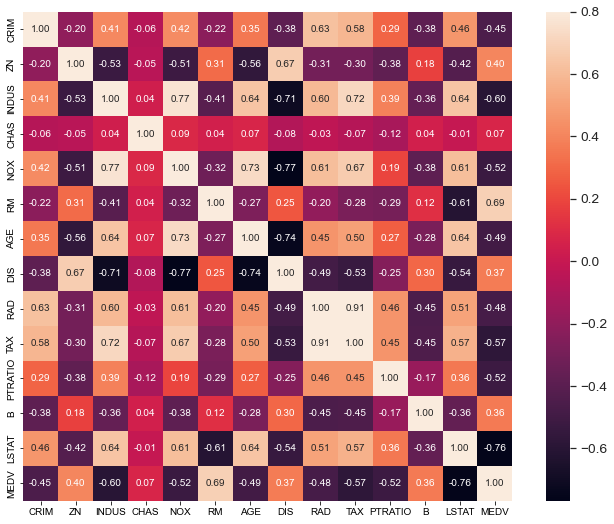

In [17]:
# correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, fmt='.2f', annot_kws={'size': 10});

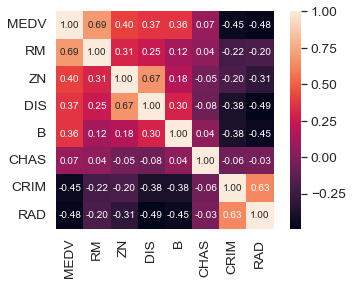

In [18]:
# MEDV correlation matrix
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'MEDV')['MEDV'].index
cm = np.corrcoef(df[cols].values.T)

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

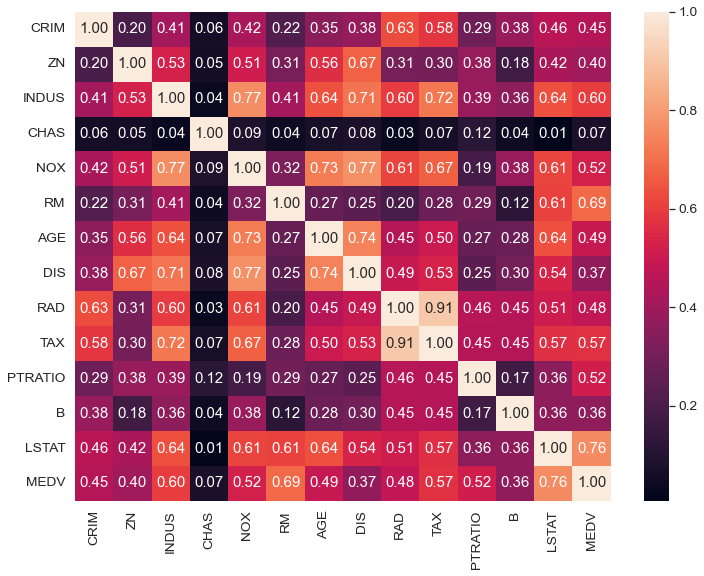

In [19]:
# correlation matrix absolute
plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
sns.heatmap(df.corr().abs(), fmt='.2f', annot=True);

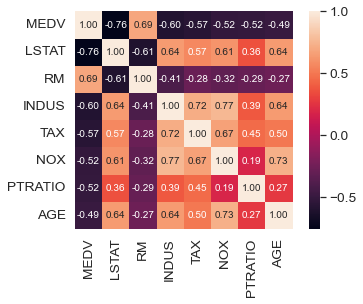

In [20]:
# MEDV correlation matrix (absolute values)
k = 8 # number of variables for heatmap
cols = corrmat.abs().nlargest(k, 'MEDV')['MEDV'].index
cm = np.corrcoef(df[cols].values.T)

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)

plt.show()

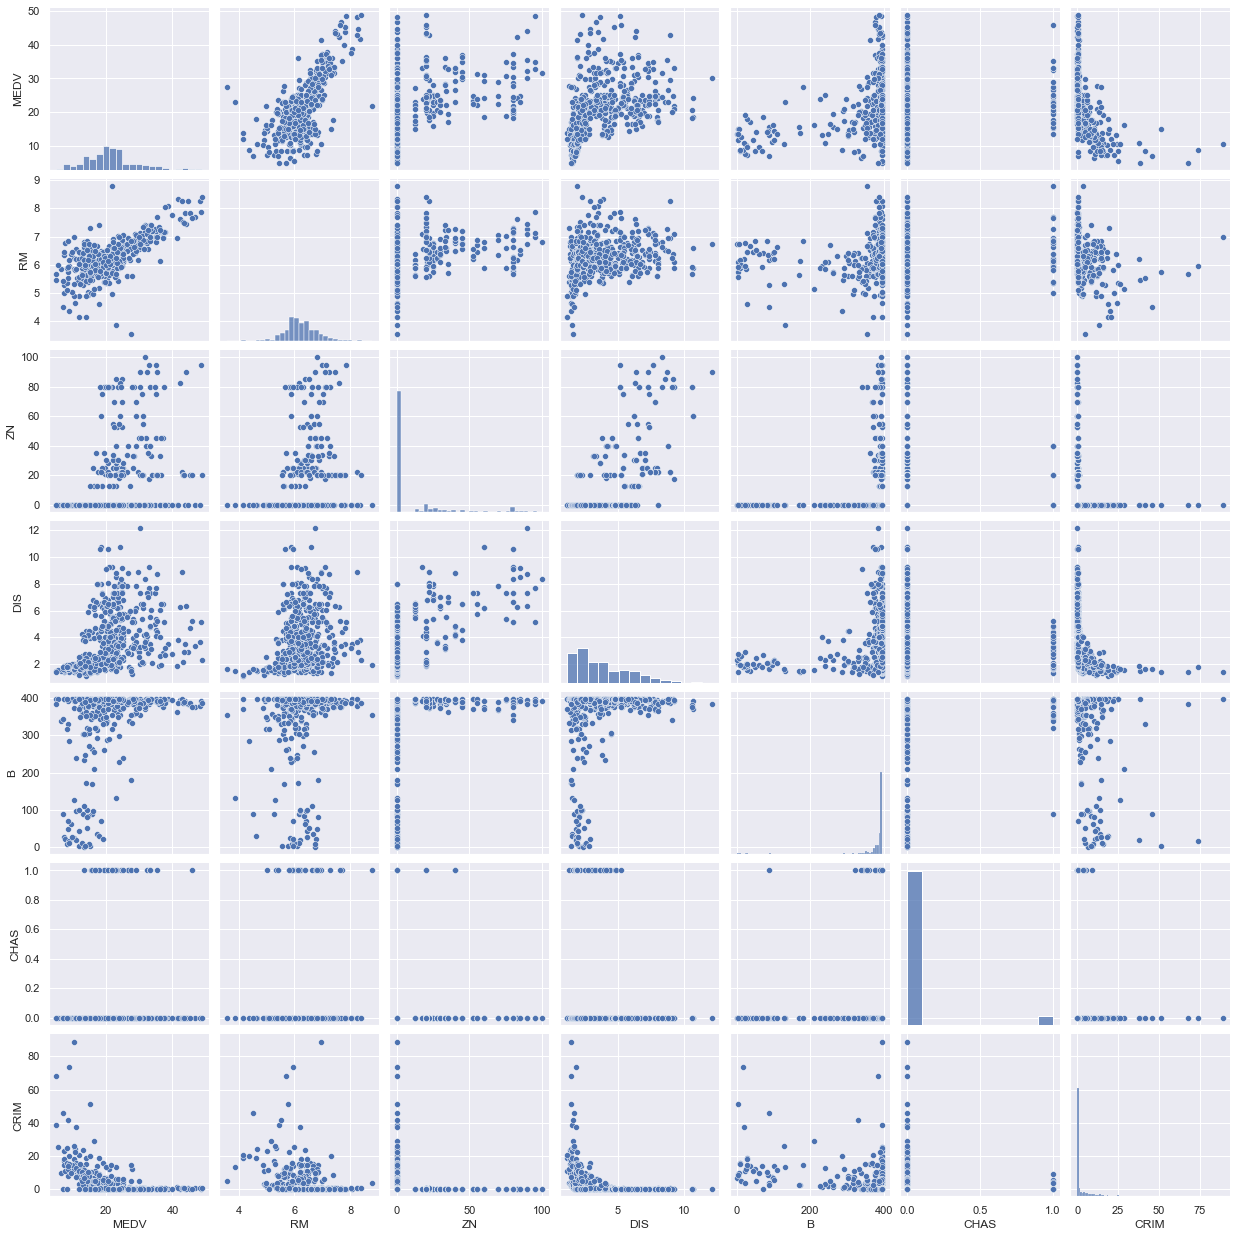

In [21]:
#scatterplot
sns.set()
cols = ['MEDV', 'RM', 'ZN', 'DIS', 'B', 'CHAS', 'CRIM']
sns.pairplot(df[cols], size = 2.5)
plt.show();

#### Выводы
Найдем объяснения высоким зависимостям:
- TAX/RAD (доступнее радиальные дороги - удобно добираться - выше стоит жилье - больше достаток населения - налоги с граждан выше)
- DIS/INDUS, DIS/NOX, DIS/AGE (Негативная во всех кейсах: дальше от центра - меньше торговых точек и больше жилых домов/ дальше от центра - меньше выхлопов, чище воздух/дальше от центра - больше новой жилой застройки, тк в центре уже нет места)
- NOX/INDUS (меньше площадей под неторговую деятельность - чище воздух)
- MEDV/LSTAT (очевидно: ниже достаток, ниже покупательная способность населения)

## Check normality

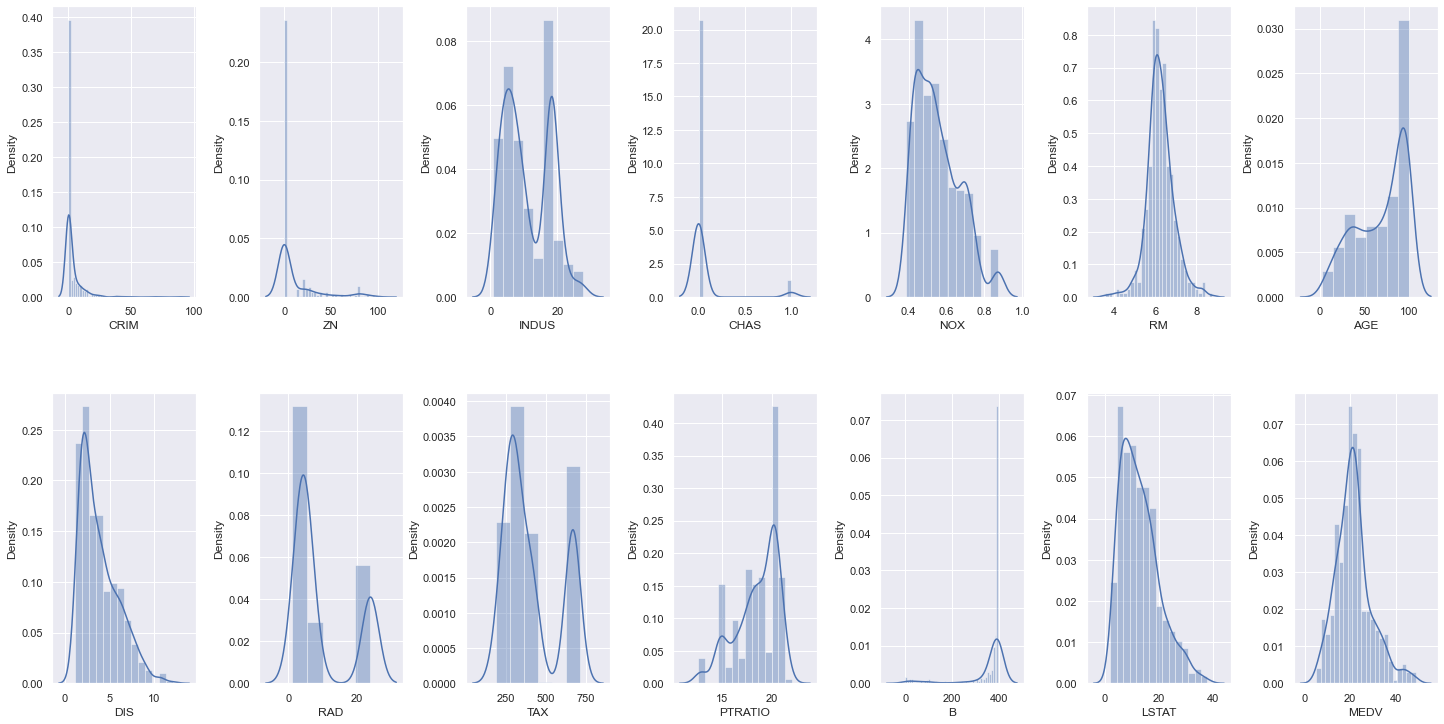

In [22]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

## Possible features and data tranformation for ML model

### Мин макс скейлим все фичи

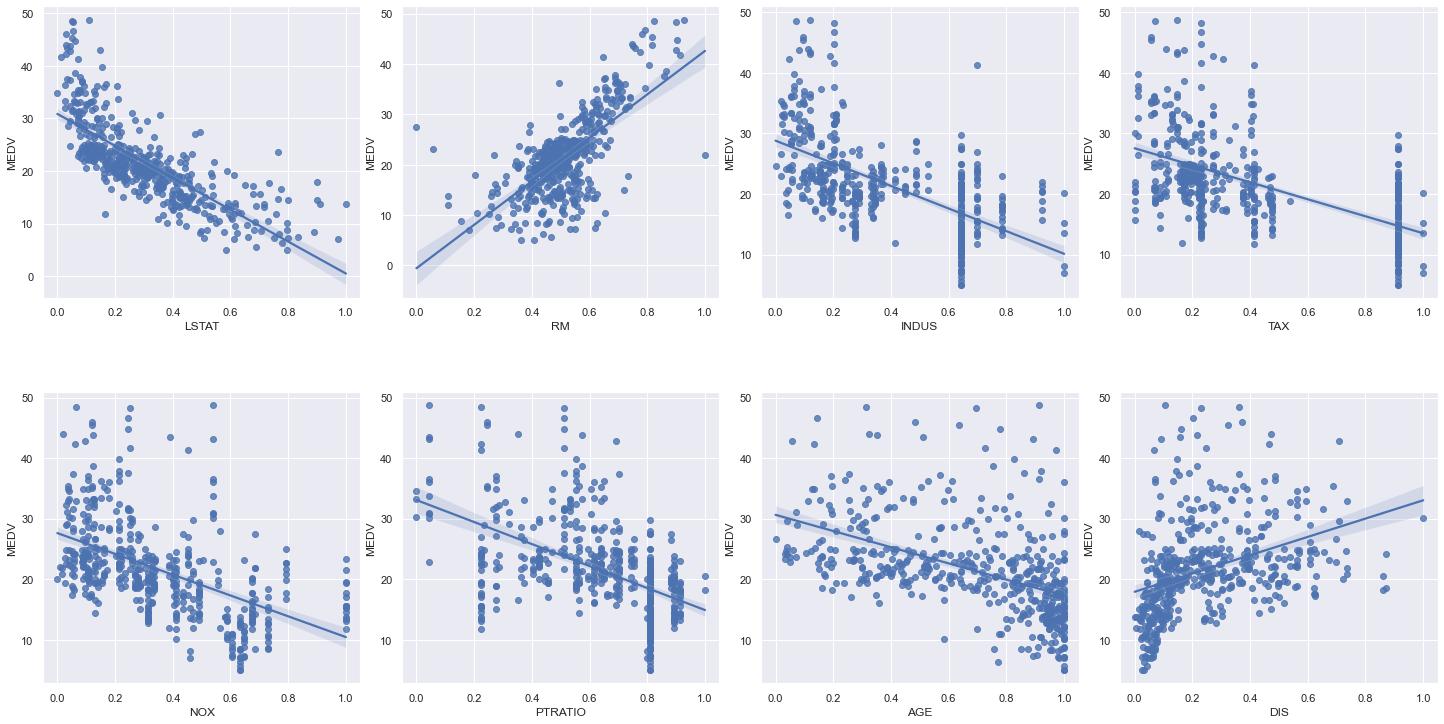

In [23]:
from sklearn import preprocessing

# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
features = ['LSTAT', 'RM', 'INDUS', 'TAX', 'NOX', 'PTRATIO', 'AGE', 'DIS']

X = df.loc[:,features]
y = df['MEDV']

X = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=features)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(features):
    sns.regplot(y=y, x=X[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [24]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for all columns
skewness = X.agg(skew)
kurtosis = X.agg(kurtosis)

# Create a table to display the results
X_skew_kurt = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
X_skew_kurt

,Skewness,Kurtosis
LSTAT,0.905,0.478
RM,0.174,2.032
INDUS,0.321,-1.196
TAX,0.679,-1.131
NOX,0.751,-0.071
PTRATIO,-0.821,-0.187
AGE,-0.586,-0.976
DIS,1.001,0.448


Next code snippet performs a log transformation on the target variable y and applies a log transformation to the features in the DataFrame X if their skewness is greater than 0.3. The intent is to address skewness in the data and improve the assumptions of linear regression or other models that assume normally distributed data.

In [25]:
y =  np.log1p(y)
for col in X.columns:
    if np.abs(X[col].skew()) > 0.3:
        X[col] = np.log1p(X[col])

### Linear, Ridge, PolyRidge regressions

In [26]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
scores = cross_val_score(l_regression, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE Linear Regression: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE Ridge: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))



MSE Linear Regression: -0.04 (+/- 0.04)
MSE Ridge: -0.0390 (+/- 0.04)


In [27]:
# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# # Params tunning
# for degree in range(2, 6):
#     model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#     scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#     print(degree, "MSE : %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE PolyRidge: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE PolyRidge: -0.0342 (+/- 0.03)


### Non-prametric regression techniques: SVR with kernal rbf, DecisionTreeRegressor, KNeighborsRegressor etc.

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# # Params tunning
# svr_rbf = SVR(kernel='rbf')
# grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
# grid_sv.fit(X_scaled, y)
# print("Best classifier :", grid_sv.best_estimator_)
# print("Best params : ", grid_sv.best_params_)
# print("Best score : ", -grid_sv.best_score_)

svr_rbf = SVR(kernel='rbf', C=1e0, gamma=1.0)
scores = cross_val_score(svr_rbf, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE SVR: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE SVR: -0.0291 (+/- 0.02)


In [29]:
from sklearn.tree import DecisionTreeRegressor

# # Params tunning
# desc_tr = DecisionTreeRegressor()
# grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
# grid_sv.fit(X_scaled, y)
# print("Best classifier :", grid_sv.best_estimator_)
# print("Best params : ", grid_sv.best_params_)
# print("Best score : ", -grid_sv.best_score_)

desc_tr = DecisionTreeRegressor(max_depth=4)
scores = cross_val_score(desc_tr, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE DecisionTreeRegressor: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE DecisionTreeRegressor: -0.0441 (+/- 0.03)


In [48]:
from sklearn.tree import RandomForestRegressor

# Params tunning
params = {
    "max_depth" : [1, 2, 3, 4, 5, 6, 7],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10]
}

desc_tr = RandomForestRegressor()
grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid=params, scoring='neg_mean_squared_error')
grid_sv.fit(X_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)
print("Best params : ", grid_sv.best_params_)
print("Best score : ", -grid_sv.best_score_)

# desc_tr = RandomForestRegressor(max_depth=4)
# scores = cross_val_score(desc_tr, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
# scores_map['DecisionTreeRegressor'] = scores
# print("MSE DecisionTreeRegressor: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

ImportError: cannot import name 'RandomForestRegressor' from 'sklearn.tree' (C:\anaconda3\lib\site-packages\sklearn\tree\__init__.py)

In [35]:
from sklearn.neighbors import KNeighborsRegressor

# Params tunning
# knn = KNeighborsRegressor()
# grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
# grid_sv.fit(X_scaled, y)
# print("Best classifier :", grid_sv.best_estimator_)
# print("Best params : ", grid_sv.best_params_)
# print("Best score : ", -grid_sv.best_score_)

knn = KNeighborsRegressor(n_neighbors=6)
scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
print("KNN Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Accuracy: -0.0443 (+/- 0.02)


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# # Params tunning
# gbr = GradientBoostingRegressor()
# param_grid={'alpha': [0.9],
#             'min_samples_split' : [2],
#             'n_estimators':[100, 200],
#             'learning_rate': [0.1, 0.05, 0.02],
#             'max_depth':[2, 4, 6],
#             'min_samples_leaf':[3, 5, 9],
#             'random_state': [30]
#            }

# grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
# grid_sv.fit(X_scaled, y)
# print("Best classifier :", grid_sv.best_estimator_, '\n')
# print("Best score :", -grid_sv.best_score_, '\n')
# print("Best params :", grid_sv.best_params_, '\n')

gbr = GradientBoostingRegressor(alpha=0.9, learning_rate=0.05, max_depth=2, min_samples_leaf=9,
                                min_samples_split=2, n_estimators=100, random_state=30)
scores = cross_val_score(gbr, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE GradientBoostingRegressor: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE GradientBoostingRegressor: -0.0283 (+/- 0.02)


In [47]:
# # TEST
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# # Params tunning
# gbr = GradientBoostingRegressor()
# param_grid={'alpha': [0.9],
#             'min_samples_split' : [2],
#             'n_estimators':[100, 200],
#             'learning_rate': [0.1, 0.05, 0.02],
#             'max_depth':[2, 4, 6],
#             'min_samples_leaf':[3, 5, 9],
#             'random_state': [30]
#            }

# scoring = {'MSE': 'neg_mean_squared_error',
#            'MAE': 'neg_mean_absolute_error',
#            'R2': 'r2'
#           }

# grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, refit='MSE', scoring=scoring)
# grid_sv.fit(X_scaled, y)
# # Print the best scores and parameters for each scoring method
# for scorer in scoring:
#     print(f"Best {scorer} score: {grid_sv.best_score_:.4f}")
#     print(f"Best {scorer} params: {grid_sv.best_params_}", '\n')

# # Access the best estimator
# print("Best classifier :", grid_sv.best_estimator_, '\n')


# # TEST
# gbr = GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_leaf=9, random_state=30)
# scores = cross_val_score(gbr, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
# scores_map['GradientBoostingRegressor'] = scores
# print("MSE GradientBoostingRegressor: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

### Plot all scores

In [43]:
scores_map

,LinearRegression,Ridge,PolyRidge,SVR,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor
0,-0.015,-0.015,-0.023,-0.029,-0.037,-0.036,-0.021
1,-0.016,-0.013,-0.010,-0.008,-0.007,-0.010,-0.007
2,-0.013,-0.012,-0.039,-0.017,-0.032,-0.026,-0.012
3,-0.023,-0.021,-0.026,-0.024,-0.037,-0.044,-0.024
4,-0.030,-0.029,-0.015,-0.015,-0.027,-0.030,-0.022
5,-0.019,-0.020,-0.008,-0.008,-0.024,-0.041,-0.015
6,-0.017,-0.017,-0.016,-0.012,-0.018,-0.022,-0.015
7,-0.146,-0.134,-0.100,-0.077,-0.090,-0.075,-0.072
8,-0.066,-0.067,-0.059,-0.060,-0.118,-0.074,-0.066
9,-0.060,-0.060,-0.047,-0.041,-0.051,-0.084,-0.030


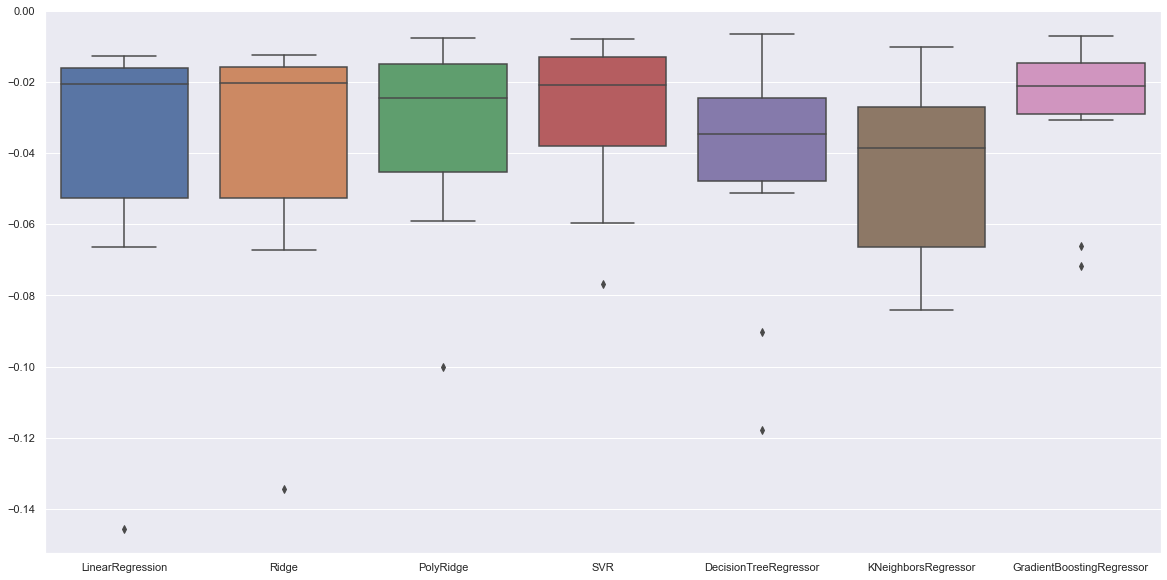

In [44]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map);

???

The models SVR and GradientBoostingRegressor show better performance with `-11.62 (+/- 5.91)` and `-12.39 (+/- 5.86)`.